In [1]:
import sys
sys.path.append("..")

from src.jump_diffusion import MertonBenchmark
from src.utils import plot_regimes_over_price, scatter_mean_variance
from src.constants import CLUSTER_PALETTE
CLUSTER_PALETTE[1], CLUSTER_PALETTE[2] = CLUSTER_PALETTE[2], CLUSTER_PALETTE[1]

In [2]:
mb = MertonBenchmark(
    n_runs=50,
    window=144,
    step=12,
    random_state=42
)
result, details, stats = mb.run(return_details=True)
result

,Total,Regime-on,Regime-off,Runtime
Algorithm,,,,
Moment,75.38% ± 2.10%,8.17% ± 3.45%,97.95% ± 3.92%,0.07s ± 0.00s
Wasserstein,93.31% ± 4.28%,86.65% ± 8.02%,95.47% ± 5.28%,0.98s ± 0.15s


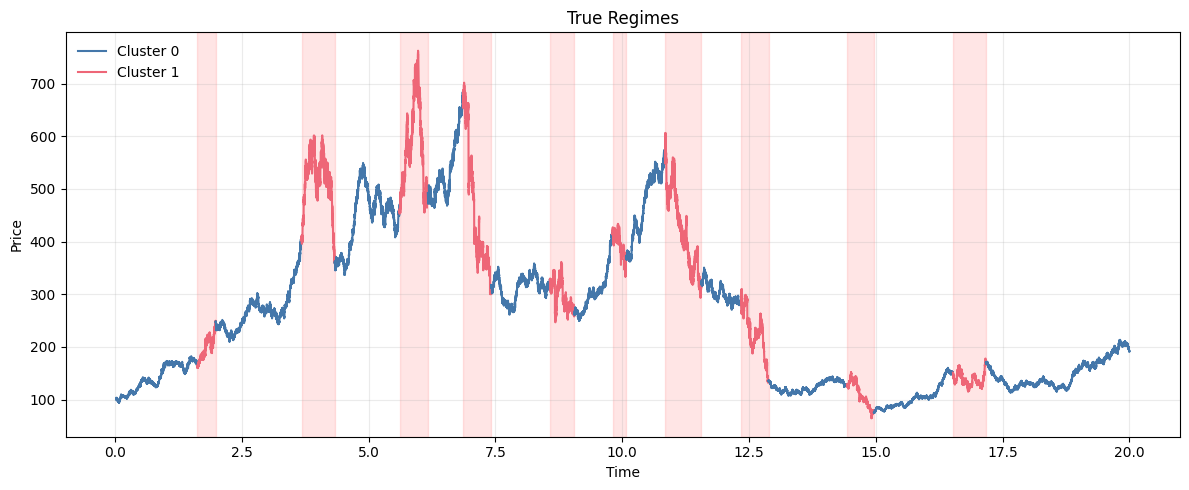

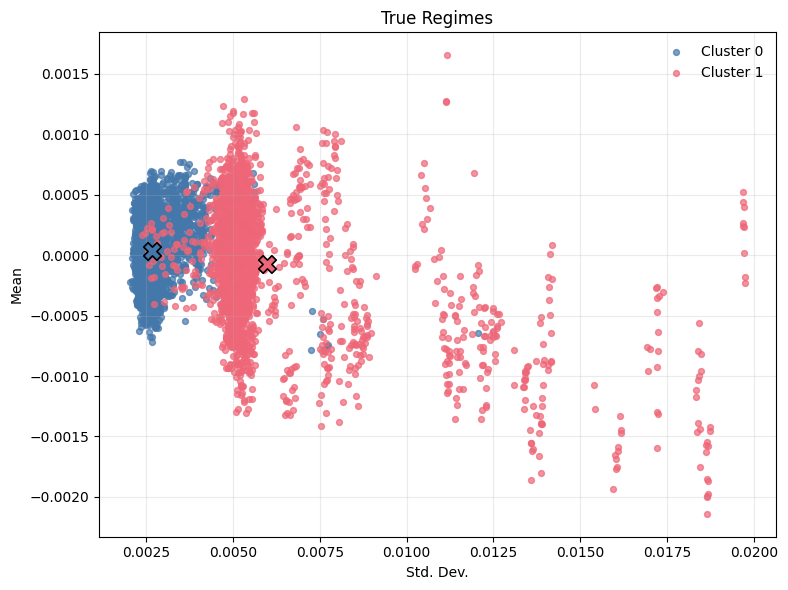

In [3]:
idx = -1
rec = details[idx]
plot_regimes_over_price(rec["prices"], rec["truth"], highlight_clusters=[1], title="True Regimes")
scatter_mean_variance(rec["segments"], rec["truth"], title="True Regimes")

Wasserstein K-Means statistics: total=98.76%, on=97.31%, off=99.28%, runtime=0.866s


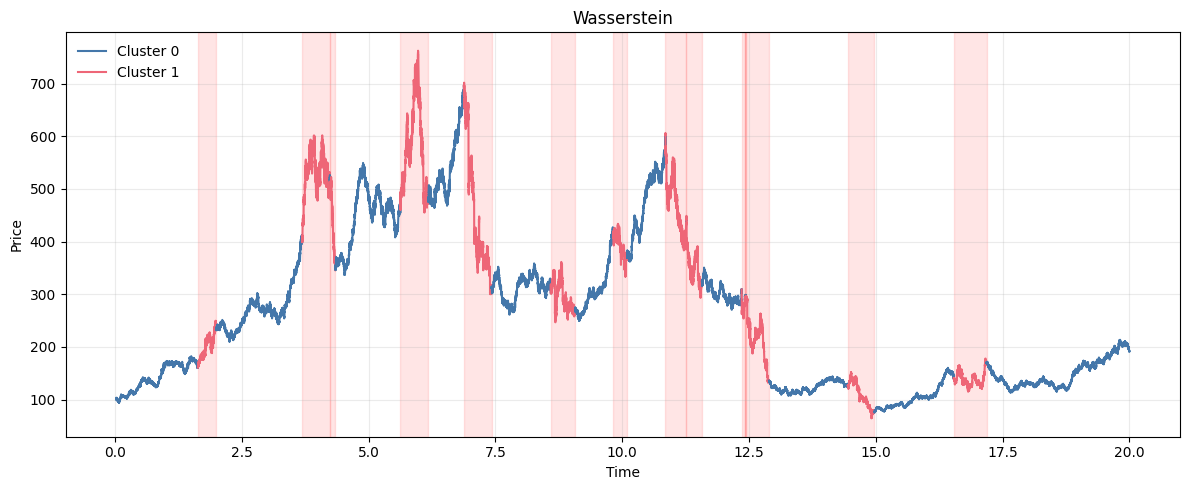

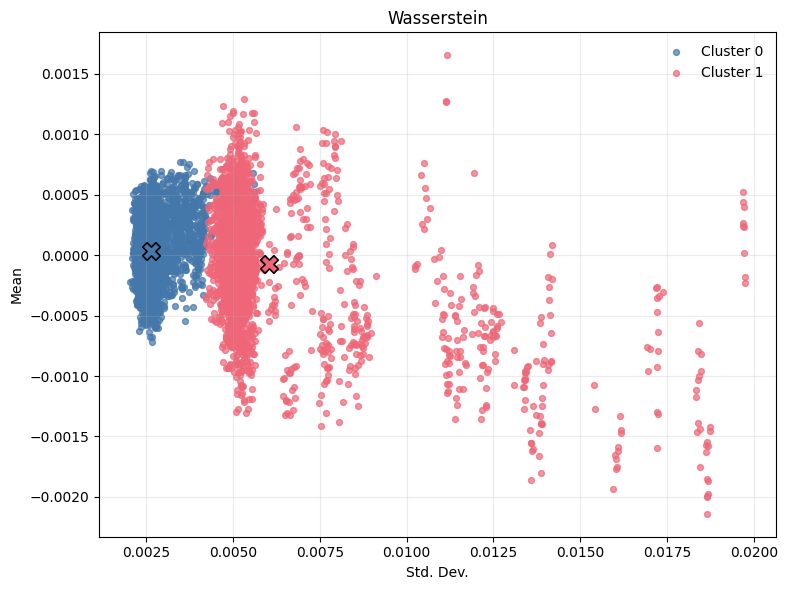

In [4]:
print("Wasserstein K-Means statistics:", stats["Wasserstein"][idx])
plot_regimes_over_price(rec["prices"], rec["predictions"]["Wasserstein"], highlight_clusters=[1], title="Wasserstein")
scatter_mean_variance(rec["segments"], rec["predictions"]["Wasserstein"], title="Wasserstein")

Moment K-Means statistics: total=75.57%, on=8.11%, off=99.99%, runtime=0.069s


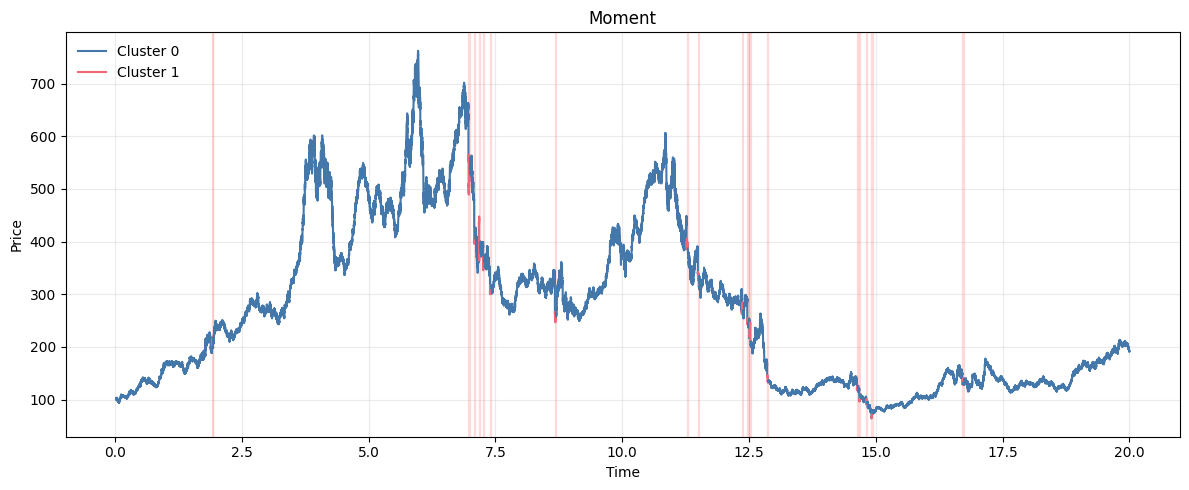

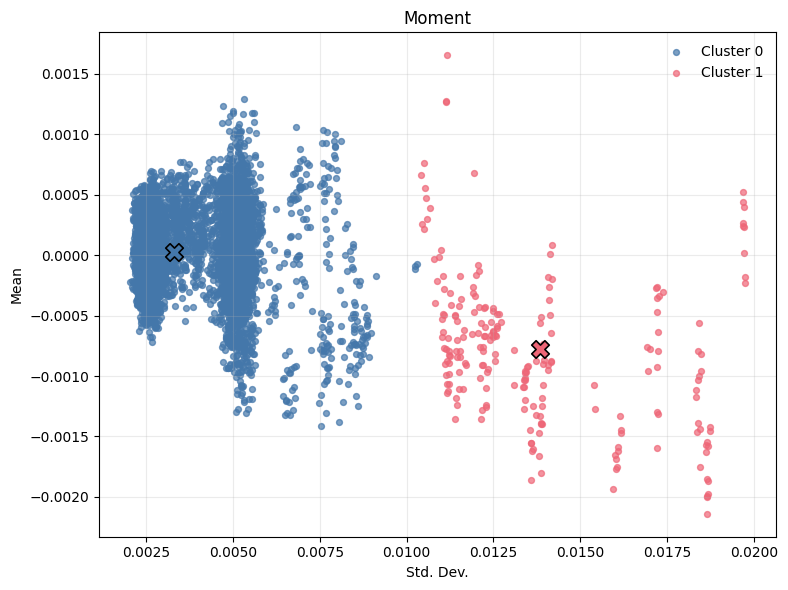

In [5]:
print("Moment K-Means statistics:", stats["Moment"][idx])
plot_regimes_over_price(rec["prices"], rec["predictions"]["Moment"], highlight_clusters=[1], title="Moment")
scatter_mean_variance(rec["segments"], rec["predictions"]["Moment"], title="Moment")